# Beyond Text: LLM Web Summarizer for Quick Content Grasping 

Unlike earlier times, we live in an era where a lot of information is published on the internet. However, it may not be possible for us to go through all of it. So, it would be useful if we get a gist of the content on the websites that we visit by using a website extension. Text summarization is a fundamental task in Natural Language Processing (NLP) with applications spanning various domains, including information retrieval and content creation. Large Language Models (LLMs) have shown significant potential in enhancing summarization techniques. 

FLAN-T5 (Finetuning language models) is a general-purpose encoder-decoder LLM which is fine tuned from the T5 model to perform a wide range of sequence-to-sequence tasks. We will train our FLAN-T5 model using the LoRa technique, which requires only a small memory footprint which reduces the number of parameters to train. This website extension will be using FLAN-T5 to summarize the selected content. The technologies include HTML, CSS, JavaScript and some Natural Language Processing libraries for summarizing t
he web content. HTML, CSS, and JavaScript will be used for the frontend purposes for displaying the extension content. Whereas in the backend we will perform web scrapping by using python libraries like Requests, BeautifulSoup, Scrapy, and Selenium to get the content of the current URL and perform summarization for that content using LLM.  

Diverse range of LLMs, such as MPT-7b-instruct, falcon-7b-instruct, and OpenAI ChatGPT, text-davinci-003 models are the current technologies employed to perform summarization by adjusting hyperparameters, and the quality of generated summaries are being evaluated using established metrics like BLEU Score, ROUGE Score, and BERT Score. Another interesting model 'EXABSUM,' exists which is an innovative Automatic Text Summarization (ATS) approach capable of generating both extractive and abstractive summaries. It uses two distinct methods: (1) an extractive technique (EXABSUM Extractive), combining statistical and semantic scoring methods to select and extract pertinent, non-repetitive sentences from a text unit, and (2) an abstractive technique (EXABSUM Abstractive), utilizing a word graph approach (including compression and fusion stages) and re-ranking based on key phrases to generate abstractive summaries using the source document as input. In the evaluation of diverse benchmarks, EXABSUM outperformed extractive summarization methods and demonstrated competitiveness against abstractive baselines. As future considerations, this project can be extended for other types of tasks too, this is possible since Flan-T5 is good for different types of text generation tasks. 


## 0. Installing Transformers and Importing Dependencies

In [1]:
!pip install transformers

In [2]:
from transformers import pipeline
from bs4 import BeautifulSoup
import requests

## 1. Load Summarization Pipeline

In [3]:
model_name = "facebook/bart-large-cnn"

In [5]:
summarizer = pipeline("summarization", model=model_name)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForConditionalGeneration: ['model.decoder.e

## 2. Model Architecture

In [7]:
from transformers import TFAutoModel, AutoConfig

In [8]:
config = AutoConfig.from_pretrained(model_name)
config

BartConfig {
  "_name_or_path": "facebook/bart-large-cnn",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "L

In [9]:
model = TFAutoModel.from_pretrained(model_name)
print(model)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartModel: ['model.decoder.embed_tokens.weight']
- This IS expected if you are initializing TFBartModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBartModel were not initialized from the PyTorch model and are newly initialized: ['model.shared.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
model.summary()

Model: "tf_bart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (TFBartMainLayer)     multiple                  406290432 
                                                                 
Total params: 406290432 (1.51 GB)
Trainable params: 406290432 (1.51 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.save("./saved_models/facebook-bart-large-cnn.keras")

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\transformers\generation\tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


## 2. Get Blog Post from Medium

In [12]:
URL = "https://medium.com/@ai-club/ml101-introduction-to-the-world-of-machine-learning-2-86e32c740b58"

In [13]:
r = requests.get(URL)

In [14]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['h1', 'p'])
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [15]:
ARTICLE

'Sign up Sign in Sign up Sign in ML101: Introduction to the world of Machine Learning — 2 PTU AI CLUB Follow -- Listen Share Authors: Harsha, Sakti Priya V, Yuvarani VD and Apurva Introduction Our last article in the ML101 series by PTU AI CLUB introduced you to the world of machine learning and its infinite use cases. In this article we will be diving a little deeper into this world by exploring the types of machine learning and the ethical aspects related to machine learning. We will also be providing you with a roadmap for getting started in this world. Enough talk, let’s ML! Types of Machine Learning Based on the methods and way of learning, machine learning is divided into mainly four types, which are: 1. Supervised Machine Learning2. Unsupervised Machine Learning3. Semi-supervised Machine Learning4. Reinforcement Learning Supervised machine learning is based on supervision. It means in the supervised learning technique, we train the machines using the “labeled” dataset, and based

## 3. Chunk Text

In [16]:
max_chunk = 500

In [17]:
ARTICLE = ARTICLE.replace('.', '.<eos>')
ARTICLE = ARTICLE.replace('?', '?<eos>')
ARTICLE = ARTICLE.replace('!', '!<eos>')

In [18]:
sentences = ARTICLE.split('<eos>')
current_chunk = 0 
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [19]:
len(chunks)

3

## 4. Summarize Text

In [20]:
res = summarizer(chunks, max_length=120, min_length=30, do_sample=False)

In [21]:
res[0]

{'summary_text': 'Old Execulouslyulously substantive sincere sincere sincereAut sincere sincere simplyAut simply simply simply armed armed Exec simply simply Exec armed armed simply simply tends simply armed simply tends tends simply tends armed tends tends tends Exec tends simply simply anatomical tends tends Orche tends tends Hofovyovy Wikipedia tends tends 38 tends Hof tends tendsovy Wikipediapolice Wikipediapolicepolice Wikipedia Wikipedia Wikipedia sects Wikipedia Wikipediapolice Isle Isle Isle validate validate restart restart restart tends}}} restart restartassianassianassian recommend recommend recommend Cor Cor tendsassianassian restart recommendBeforeBeforeLife Freder Freder Freder prayed Freder conservatives conservatives conservatives654654uder trillions trillionsuder trillions'}

In [22]:
' '.join([summ['summary_text'] for summ in res])

'Old Execulouslyulously substantive sincere sincere sincereAut sincere sincere simplyAut simply simply simply armed armed Exec simply simply Exec armed armed simply simply tends simply armed simply tends tends simply tends armed tends tends tends Exec tends simply simply anatomical tends tends Orche tends tends Hofovyovy Wikipedia tends tends 38 tends Hof tends tendsovy Wikipediapolice Wikipediapolicepolice Wikipedia Wikipedia Wikipedia sects Wikipedia Wikipediapolice Isle Isle Isle validate validate restart restart restart tends}}} restart restartassianassianassian recommend recommend recommend Cor Cor tendsassianassian restart recommendBeforeBeforeLife Freder Freder Freder prayed Freder conservatives conservatives conservatives654654uder trillions trillionsuder trillions  Hear chattingrossorossorosso simply Fuji AFB Instit Ul Instit Instit carved prospective prospective prospective tong prospective prospectiveosa prospective prospective [ [ [ prospective prospective ng prospective ng

In [23]:
text = ' '.join([summ['summary_text'] for summ in res])

In [24]:
text

'Old Execulouslyulously substantive sincere sincere sincereAut sincere sincere simplyAut simply simply simply armed armed Exec simply simply Exec armed armed simply simply tends simply armed simply tends tends simply tends armed tends tends tends Exec tends simply simply anatomical tends tends Orche tends tends Hofovyovy Wikipedia tends tends 38 tends Hof tends tendsovy Wikipediapolice Wikipediapolicepolice Wikipedia Wikipedia Wikipedia sects Wikipedia Wikipediapolice Isle Isle Isle validate validate restart restart restart tends}}} restart restartassianassianassian recommend recommend recommend Cor Cor tendsassianassian restart recommendBeforeBeforeLife Freder Freder Freder prayed Freder conservatives conservatives conservatives654654uder trillions trillionsuder trillions  Hear chattingrossorossorosso simply Fuji AFB Instit Ul Instit Instit carved prospective prospective prospective tong prospective prospectiveosa prospective prospective [ [ [ prospective prospective ng prospective ng

## 5. Evaluation

In [ ]:
!pip install rouge

In [25]:
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(text, ARTICLE)

In [26]:
scores

[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]

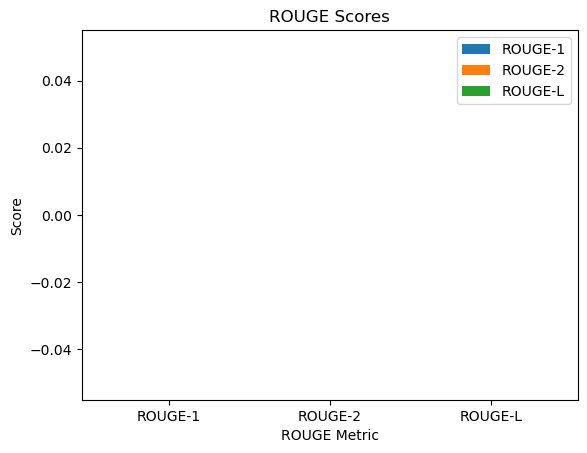

In [27]:
import matplotlib.pyplot as plt


rouge_1_scores = [score['rouge-1']['f'] for score in scores]
rouge_2_scores = [score['rouge-2']['f'] for score in scores]
rouge_l_scores = [score['rouge-l']['f'] for score in scores]

labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
plt.bar(labels, rouge_1_scores, label='ROUGE-1')
plt.bar(labels, rouge_2_scores, label='ROUGE-2')
plt.bar(labels, rouge_l_scores, label='ROUGE-L')

plt.xlabel('ROUGE Metric')
plt.ylabel('Score')
plt.title('ROUGE Scores')
plt.legend()

plt.show()


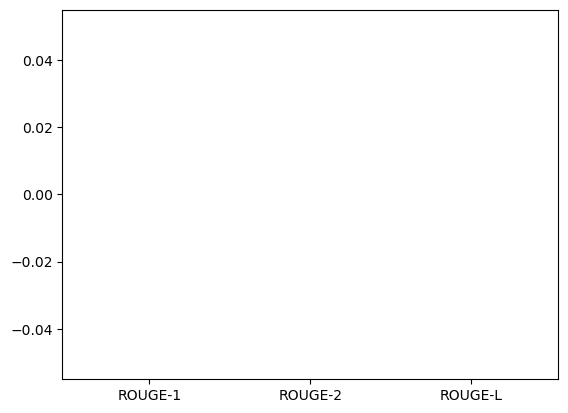

In [28]:
rouge_1_scores = [score['rouge-1']['f'] for score in scores]
plt.bar(labels, rouge_1_scores, label='ROUGE-1')
plt.show()

##  6. Output to Text File

In [29]:
with open('./summarized-results/intro-to-machine-learning/bart.txt', 'w') as f:
    f.write(text)